<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/05_warmup_SOLUTION.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# WARMUP | Lesson 05

**Goal**: Plot a timeseries of the annual average number of magnitude 6 (or larger) earthquakes.

In this warmup, you will demonstrate your proficiency in using `pandas` and `matplotlib` for scientific data analysis in a Jupyter notebook.  I am intentionally not providing much guidance in this exercise, leaving it to you to determine the best path to the goal.  That said, I do have some specific instructions:

* download [this CSV](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/spring_2023_iub/lessons/05_multidimensional_arrays_also_plotting/data/usgs_major_earthquakes_1900-2023.csv) file containing a dataset of all earthquakes greater than magnitude 6 that USGS has on record since 1900
* utilize Markdown cells extensively to document your thought process, including notes about the CSV file, its origin, etc.
* comment your code extensively
* use git to stage/commit/push this notebook to your course github repository once done (in a lesson 04 folder)
* bonus: if you still have time, also make a plot of # of earthquakes vs month (the seasonal cycle, if there is one)

A note about the CSV file: I obtained it from [a USGS query for magnitude 6 or larger earthquakes globally since 1900](https://earthquake.usgs.gov/earthquakes/map/?extent=-88.71618,-248.20313&extent=88.70033,336.79688&range=search&timeZone=utc&search=%7B%22name%22:%22Search%20Results%22,%22params%22:%7B%22starttime%22:%221900-01-01%2000:00:00%22,%22endtime%22:%222023-09-22%2023:59:59%22,%22minmagnitude%22:6,%22orderby%22:%22time%22%7D%7D) on Friday September 22, 2023 at 10:20am Eastern.  Though USGS ultimately was the source of the data, my search originated from an [NCEI website](https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/search).  (See the markdown source of this cell for the specific URLs; the USGS query URL contains the specific query parameters.)

I used the CSV download option provided on the website, and the file was downloaded as `query.csv`; I renamed the file to `usgs_major_earthquakes_1900-2023.csv`.

When I download data like this from a web source, I'll often put it in a `data` folder somewhere and will place a `README` (or `README.md`) file in the `data` directory to give information about where I downloaded the data from and any citations that the data provider requests that I use.  I do this because I often come back to datasets like this later on and it isn't always straightforward to find this information after the fact.

# Solution

## Reading the file

Examination of the CSV file shows the contents appear like this:

```
time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2023-09-21T21:11:49.950Z,-14.0039,167.1898,188.419,6.1,mww,76,26,7.076,0.83,us,us7000kx7j,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33,reviewed,us,us
2023-09-20T14:45:58.609Z,-4.5826,-105.6493,10,6,mww,110,208,15.828,1.08,us,us7000kww3,2023-09-21T21:02:41.950Z,"central East Pacific Rise",earthquake,14.99,1.952,0.05,38,reviewed,us,us
2023-09-18T13:21:23.790Z,26.4336,125.3032,183.483,6.3,mww,113,35,2.262,1.21,us,us7000kwg2,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49,reviewed,us,us
```

The first line has a header that pandas should be able to use, and the first column appears to be in a date/time format that pandas should be able to parse.  I see that the third from last column, `status`, shows as `reviewed` for these entries, but perhaps there are entries that aren't reviewed (not sure who's doing the reviewing -- I should probably read the documentation).  It might be worth considering a variant of this analysis that filters unreviewed entries if there are any.

It looks like it should be straightforward to read this with pandas.

In [1]:
""" import libraries """
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
""" read the earthquake database """

# use pandas to read the dataset
usgs_pd = pd.read_csv(
    "data/usgs_major_earthquakes_1900-2023.csv",
    header=0,
    parse_dates=[0],
    )

# show the top of the dataset
usgs_pd.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-09-21 21:11:49.950000+00:00,-14.0039,167.1898,188.419,6.1,mww,76.0,26.0,7.076,0.83,...,2023-09-21T23:17:30.631Z,"41 km WSW of Sola, Vanuatu",earthquake,8.86,4.898,0.054,33.0,reviewed,us,us
1,2023-09-20 14:45:58.609000+00:00,-4.5826,-105.6493,10.000,6.0,mww,110.0,208.0,15.828,1.08,...,2023-09-21T21:02:41.950Z,central East Pacific Rise,earthquake,14.99,1.952,0.050,38.0,reviewed,us,us
2,2023-09-18 13:21:23.790000+00:00,26.4336,125.3032,183.483,6.3,mww,113.0,35.0,2.262,1.21,...,2023-09-19T13:29:35.504Z,"180 km N of Hirara, Japan",earthquake,6.53,4.942,0.044,49.0,reviewed,us,us
3,2023-09-13 11:49:15.926000+00:00,-36.2201,-97.9378,10.000,6.1,mww,117.0,37.0,13.309,0.65,...,2023-09-14T11:52:11.466Z,West Chile Rise,earthquake,10.28,1.860,0.050,39.0,reviewed,us,us
4,2023-09-12 11:03:18.873000+00:00,19.2687,121.2178,41.281,6.3,mww,133.0,21.0,4.049,0.96,...,2023-09-18T13:59:24.715Z,"73 km N of Namuac, Philippines",earthquake,8.03,5.112,0.046,46.0,reviewed,us,us


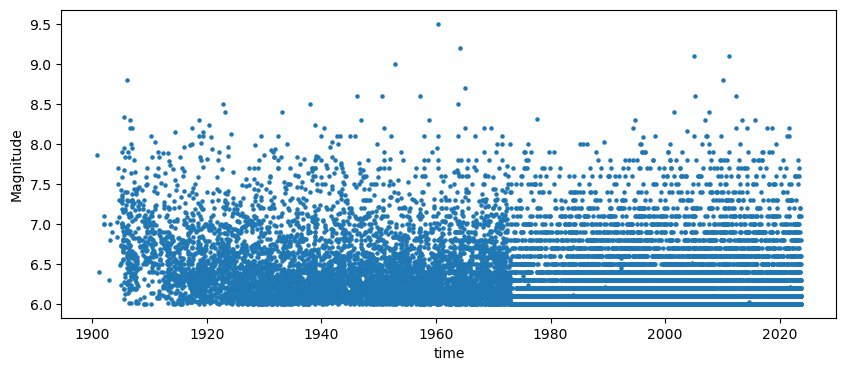

In [3]:
""" Plot earthquake magnitude vs time. """

# make the figure
fig, ax = plt.subplots(figsize=(10,4))
# draw the plot
usgs_pd.plot.scatter("time", "mag", ax = ax, marker = '.')
# set labels
ax.set_ylabel("Magnitude")
# show the plot
plt.show()

A few things jump out:

1. there are very few earthquakes recorded before about 1910
2. after about 1975, it looks like most earthquake magnitudes are given fixed values (guessing these are decimal values)
3. there does not appear to be any obvious secular trend in the data

The first point will definitely affect the annual averaging process before that point, so I might want to just plot 1910 onward.  I'm not sure whether the quantization of the magnitudes will have an effect on average earthquake magnitude,but it probably won't matter for the count unless there are many 5.9-6.0 magnitude earthquakes that end up being counted as 6.0.

## Averaging and counting by year

In [4]:
""" Generate average magnitudes and total counts for each year """

# get the year of each earthquake
earthquake_year = usgs_pd['time'].dt.year

# group by year
usgs_year_group = usgs_pd.groupby(earthquake_year)

# get the number of counts in each year
usgs_year_counts = usgs_year_group['mag'].count()

# get the average magnitude in each year
usgs_year_mag = usgs_year_group['mag'].mean()


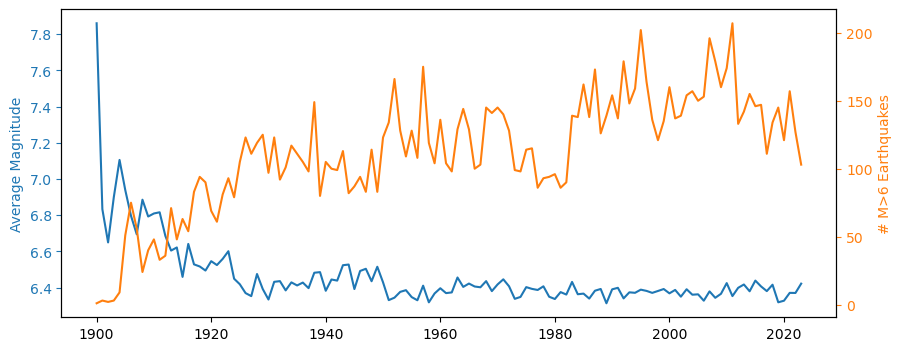

In [5]:
""" Plot the average magnitude and total counts vs time. """

# make the figure
fig, ax = plt.subplots(figsize=(10,4))
# draw the plot
l1 = ax.plot(usgs_year_mag, color = 'C0', label = 'Average Magnitude')
# create a twin axis
ax2 = ax.twinx()
# draw the plot
l2 = ax2.plot(usgs_year_counts, color = 'C1', label = '# M>6 Earthquakes')

# set labels
ax.set_ylabel("Average Magnitude")
ax2.set_ylabel("# M>6 Earthquakes")

# set the color of the y-axis tick labels, ticks, and labels to match the line color
ax.tick_params(axis='y', colors=l1[0].get_color())
ax2.tick_params(axis='y', colors=l2[0].get_color())
ax.yaxis.label.set_color(l1[0].get_color())
ax2.yaxis.label.set_color(l2[0].get_color())

# show the plot
plt.show()


So there is clearly weirdness before about 1910 as noted above, but there also appears to be some long-term trends in the data up until about 1945, and a long-term increase in the number of recorded earthquakes. My hypothesis is that seismometer sensitivity has increased over time, leading to an increase in the number of smaller earthquakes, and--since there is a powerlaw distribution of earthquakes--a systematically lower average.  If this hypothesis is true, then I would expect that PDFs of earthquake magnitude would show a systematic increase in smaller earthquakes.

## BONUS: Seasonal cycle

I'm curious if there is a seasonal cycle in the number of earthquakes.  Since there is a secular trend in earthquake counts, I'll use more recent data for this: from 1980 onward.

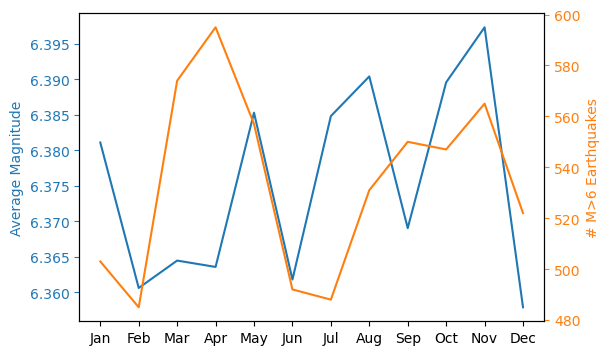

In [6]:
""" Plot the seasonal cycle """

# subset the data to only include 1980 to present
usgs_pd_recent = usgs_pd[usgs_pd['time'].dt.year >= 1980]

# get the month of each earthquake
earthquake_month = usgs_pd_recent['time'].dt.month

# group by month
usgs_month_group = usgs_pd_recent.groupby(earthquake_month)

# get the number of counts in each month
usgs_month_counts = usgs_month_group['mag'].count()

# get the average magnitude in each month
usgs_month_mag = usgs_month_group['mag'].mean()

# make the figure
fig, ax = plt.subplots(figsize=(6,4))
# draw the plot
l1 = ax.plot(usgs_month_mag, color = 'C0', label = 'Average Magnitude')
# create a twin axis
ax2 = ax.twinx()
# draw the plot
l2 = ax2.plot(usgs_month_counts, color = 'C1', label = '# M>6 Earthquakes')

# set labels
ax.set_ylabel("Average Magnitude")
ax2.set_ylabel("# M>6 Earthquakes")

# set the color of the y-axis tick labels, ticks, and labels to match the line color
ax.tick_params(axis='y', colors=l1[0].get_color())
ax2.tick_params(axis='y', colors=l2[0].get_color())
ax.yaxis.label.set_color(l1[0].get_color())
ax2.yaxis.label.set_color(l2[0].get_color())

# label the x-axis as month names
ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# show the plot
plt.show()



Huh...it does look like there might be some systematic seasonal variation in count, with more in boreal Spring and Fall.  Does the change in temperature associated with the seasons possibly cause variation in strain?